Nernay Kumar
Intern Id 
INT2026-9021

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [9]:
# 1. Load and understand the dataset

# --- IMPORTANT: Replace with your dataset loading code ---
# Example: df = pd.read_csv('your_dataset.csv')
# Example: df = pd.read_excel('your_dataset.xlsx')

# Placeholder for demonstration (replace with your actual data loading)
data = {'Feature1': np.random.rand(100), 'Feature2': np.random.randint(1, 100, 100), 'Category': np.random.choice(['A', 'B', 'C'], 100)}
df = pd.DataFrame(data)

print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nDataset Description:")
print(df.describe(include='all'))
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Head:
   Feature1  Feature2 Category
0  0.436214        43        A
1  0.246153        19        C
2  0.285758        75        C
3  0.147226        15        B
4  0.910632        26        A

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  100 non-null    float64
 1   Feature2  100 non-null    int32  
 2   Category  100 non-null    object 
dtypes: float64(1), int32(1), object(1)
memory usage: 2.1+ KB

Dataset Description:
          Feature1    Feature2 Category
count   100.000000  100.000000      100
unique         NaN         NaN        3
top            NaN         NaN        C
freq           NaN         NaN       44
mean      0.545334   56.750000      NaN
std       0.289244   28.259038      NaN
min       0.003065    1.000000      NaN
25%       0.291176   38.000000      NaN
50%       0.558721   62.000000      NaN
75%

In [10]:
# 2. Clean the dataset thoroughly

# For demonstration, let's introduce some missing values and duplicates to clean
clean_df = df.copy()

# Introduce 10% missing values in Feature1
missing_idx_f1 = clean_df.sample(frac=0.1, random_state=42).index
clean_df.loc[missing_idx_f1, 'Feature1'] = np.nan

# Introduce 5% missing values in Feature2
missing_idx_f2 = clean_df.sample(frac=0.05, random_state=42).index
clean_df.loc[missing_idx_f2, 'Feature2'] = np.nan

# Add some duplicate rows
dups_to_add = clean_df.sample(n=5, random_state=42)
clean_df = pd.concat([clean_df, dups_to_add], ignore_index=True)

print("\nDataset before cleaning (with introduced messiness):")
print(clean_df.isnull().sum())
print(f"Duplicates before cleaning: {clean_df.duplicated().sum()}")

# --- Cleaning steps ---

# Fill missing numerical values with the mean
for col in clean_df.select_dtypes(include=np.number).columns:
    if clean_df[col].isnull().any():
        clean_df[col] = clean_df[col].fillna(clean_df[col].mean())

# Fill missing categorical values with the mode
for col in clean_df.select_dtypes(include='object').columns:
    if clean_df[col].isnull().any():
        clean_df[col] = clean_df[col].fillna(clean_df[col].mode()[0])

# Remove duplicate rows
initial_rows = len(clean_df)
clean_df.drop_duplicates(inplace=True)
duplicates_removed = initial_rows - len(clean_df)

print("\nDataset after cleaning:")
print(clean_df.isnull().sum())
print(f"Duplicates removed: {duplicates_removed}")
print(f"Dataset shape after cleaning: {clean_df.shape}")


Dataset before cleaning (with introduced messiness):
Feature1    15
Feature2    10
Category     0
dtype: int64
Duplicates before cleaning: 9

Dataset after cleaning:
Feature1    0
Feature2    0
Category    0
dtype: int64
Duplicates removed: 9
Dataset shape after cleaning: (96, 3)


In [11]:
# 3. Perform meaningful analysis

# Analyze distribution of numerical features
print("\nDescriptive Statistics for Numerical Features after Cleaning:")
print(clean_df.select_dtypes(include=np.number).describe())

# Analyze distribution of categorical features
print("\nValue Counts for Categorical Feature (Category) after Cleaning:")
print(clean_df['Category'].value_counts())

# Example: Correlation between numerical features (if more than one)
if len(clean_df.select_dtypes(include=np.number).columns) >= 2:
    print("\nCorrelation Matrix:")
    print(clean_df.select_dtypes(include=np.number).corr())
else:
    print("\nNot enough numerical features for correlation analysis.")

# Example: Grouped analysis
print("\nAverage Feature1 by Category:")
print(clean_df.groupby('Category')['Feature1'].mean())


Descriptive Statistics for Numerical Features after Cleaning:
        Feature1   Feature2
count  96.000000  96.000000
mean    0.543901  56.652632
std     0.287855  27.858956
min     0.003065   1.000000
25%     0.285442  39.000000
50%     0.543901  62.000000
75%     0.792744  80.250000
max     0.991462  98.000000

Value Counts for Categorical Feature (Category) after Cleaning:
Category
C    40
A    28
B    28
Name: count, dtype: int64

Correlation Matrix:
          Feature1  Feature2
Feature1  1.000000 -0.079774
Feature2 -0.079774  1.000000

Average Feature1 by Category:
Category
A    0.577693
B    0.597754
C    0.482550
Name: Feature1, dtype: float64


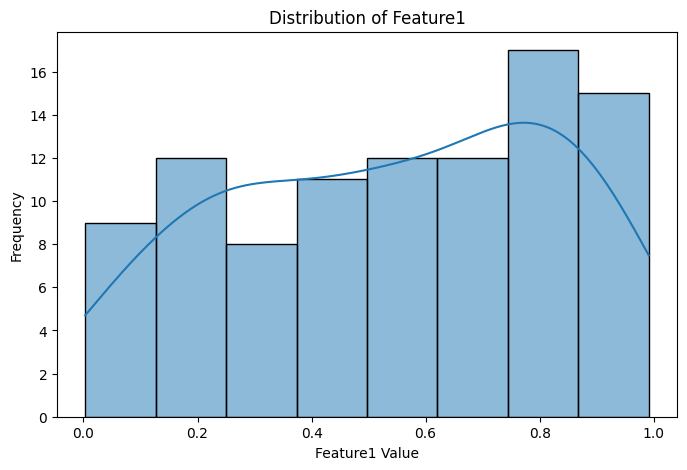

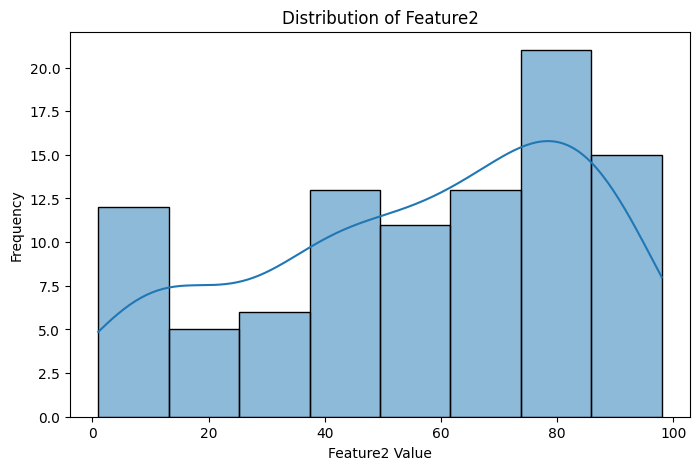

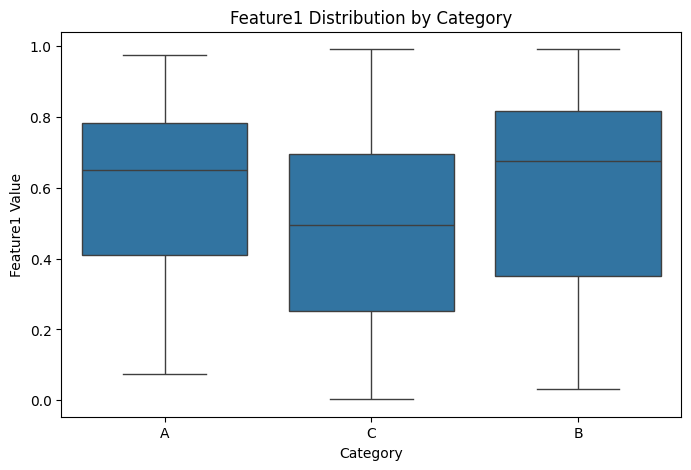

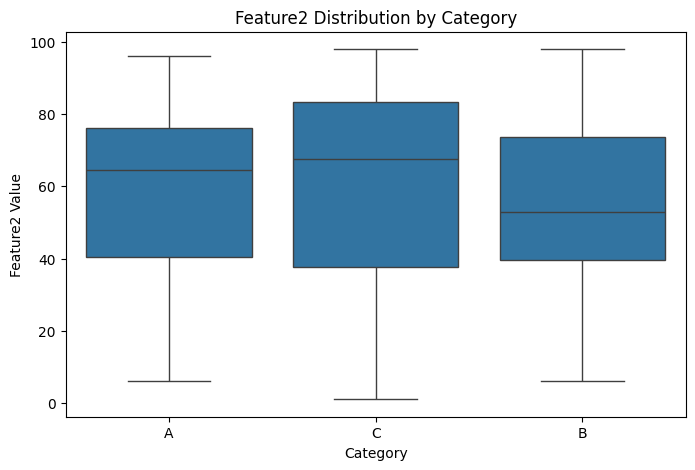

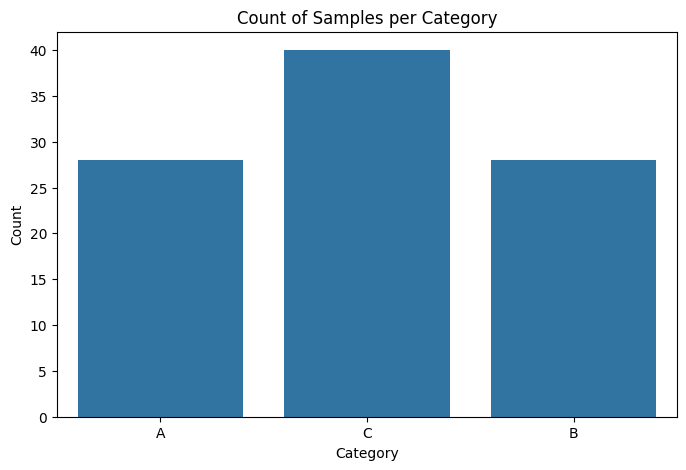

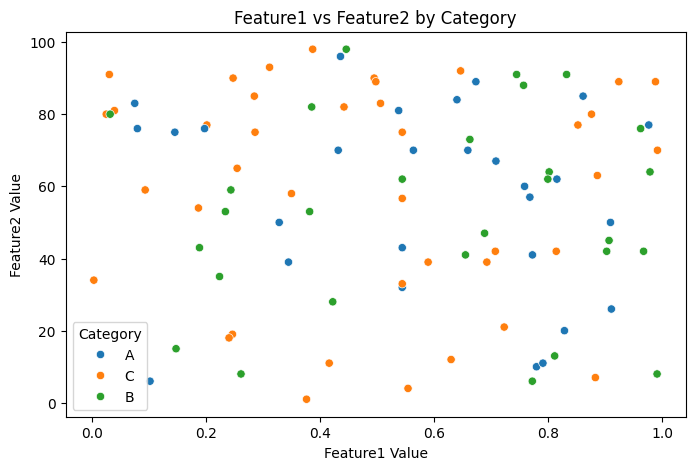

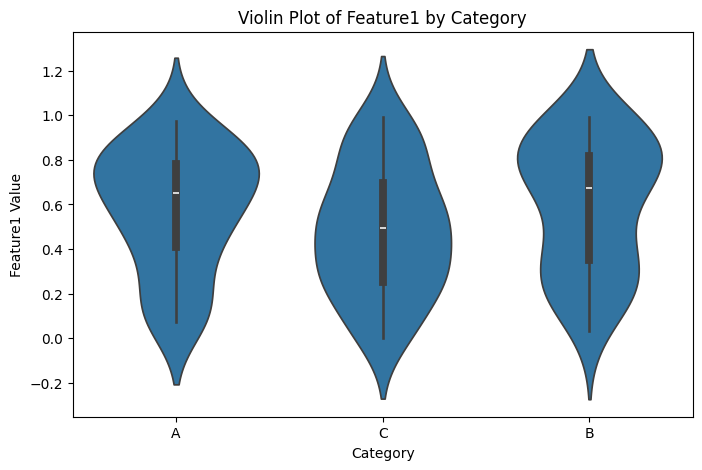

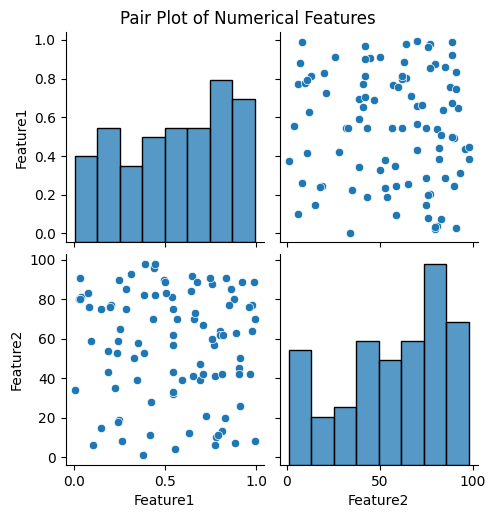

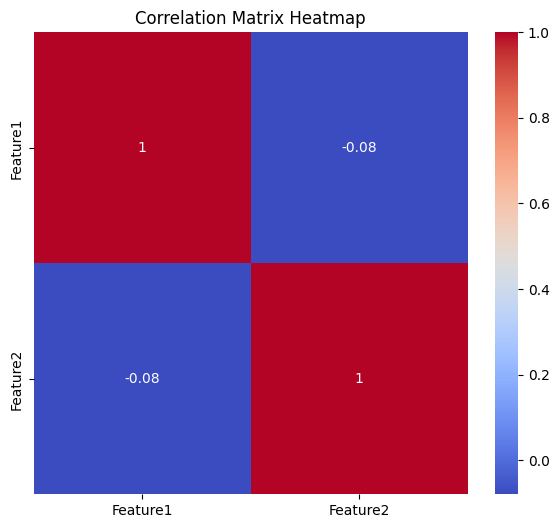

In [12]:
# 4. Create at least six visualizations

# Visualization 1: Histogram of Feature1
plt.figure(figsize=(8, 5))
sns.histplot(clean_df['Feature1'], kde=True)
plt.title('Distribution of Feature1')
plt.xlabel('Feature1 Value')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Histogram of Feature2
plt.figure(figsize=(8, 5))
sns.histplot(clean_df['Feature2'], kde=True)
plt.title('Distribution of Feature2')
plt.xlabel('Feature2 Value')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Box Plot of Feature1 by Category
plt.figure(figsize=(8, 5))
sns.boxplot(x='Category', y='Feature1', data=clean_df)
plt.title('Feature1 Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Feature1 Value')
plt.show()

# Visualization 4: Box Plot of Feature2 by Category
plt.figure(figsize=(8, 5))
sns.boxplot(x='Category', y='Feature2', data=clean_df)
plt.title('Feature2 Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Feature2 Value')
plt.show()

# Visualization 5: Count Plot of Categories
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=clean_df)
plt.title('Count of Samples per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Visualization 6: Scatter Plot of Feature1 vs Feature2
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Feature1', y='Feature2', hue='Category', data=clean_df)
plt.title('Feature1 vs Feature2 by Category')
plt.xlabel('Feature1 Value')
plt.ylabel('Feature2 Value')
plt.legend(title='Category')
plt.show()

# Visualization 7: Violin Plot of Feature1 by Category
plt.figure(figsize=(8, 5))
sns.violinplot(x='Category', y='Feature1', data=clean_df)
plt.title('Violin Plot of Feature1 by Category')
plt.xlabel('Category')
plt.ylabel('Feature1 Value')
plt.show()

# Visualization 8: Pair Plot of Numerical Features
sns.pairplot(clean_df.select_dtypes(include=np.number))
plt.suptitle('Pair Plot of Numerical Features', y=1.02) # Adjust suptitle position
plt.show()

# Visualization 9: Heatmap of Correlation Matrix
plt.figure(figsize=(7, 6))
sns.heatmap(clean_df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()